# code to demo where we have known spikes and bad channels to apply to ECoG TBI data

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
from py_ecog_utils import line_length, bipolar_select

#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib import colormaps
%matplotlib widget

import mne

# use neurodsp toolbox to generate signal and plot

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed,create_times

# import utilities for plotting
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.time_series import plot_time_series, plot_bursts

In [36]:
data_base_path = '/Users/davidcaldwell/Data/seahorse_data/an/preprocessed'
data_specific = '/EC129/EC129_B9'
data_dict= scipy.io.loadmat(data_base_path + data_specific + '/MAT files/EC129_B9_notched.mat')
bad_channels = scipy.io.loadmat(data_base_path + data_specific + '/EC129_B9_badch.mat')

In [40]:
sfx = data_dict['sfx'].item()
data_int = data_dict['d']
ch_names = [str(i) for i in range(data_int.shape[1])]
info = mne.create_info(ch_names=ch_names, sfreq=sfx, ch_types='ecog')
raw = mne.io.RawArray(data_int.T, info)
data_ll = line_length.line_length_transform(data_int, sfx=sfx,llw=0.04,badch=bad_channels)
raw_ll = mne.io.RawArray(data_ll.T, info)


Creating RawArray with float64 data, n_channels=330, n_times=190449
    Range : 0 ... 190448 =      0.000 ...   371.969 secs
Ready.
Creating RawArray with float64 data, n_channels=330, n_times=190449
    Range : 0 ... 190448 =      0.000 ...   371.969 secs
Ready.


## Working on example bipolar re-referencing

In [157]:
# define bipolar channel list, make into function 
cathode_list, anode_list,distance_list = bipolar_select.generate_bipolar_pair_list(6,256,10)


In [158]:
raw_bip_ref = mne.set_bipolar_reference(raw, anode=anode_list,cathode=cathode_list)

ECoG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=21, n_times=190449
    Range : 0 ... 190448 =      0.000 ...   371.969 secs
Ready.
Added the following bipolar channels:
256-257, 256-258, 256-259, 256-260, 256-261, 256-262, 257-258, 257-259, 257-260, 257-261, 257-262, 258-259, 258-260, 258-261, 258-262, 259-260, 259-261, 259-262, 260-261, 260-262, 261-262


In [159]:
select_list = bipolar_select.generate_select_list(anode_list, cathode_list, distance_list,distance_int=10)


In [165]:
data_int =raw_bip_ref.get_data(select_list)

In [166]:
data_int.shape

(6, 190449)

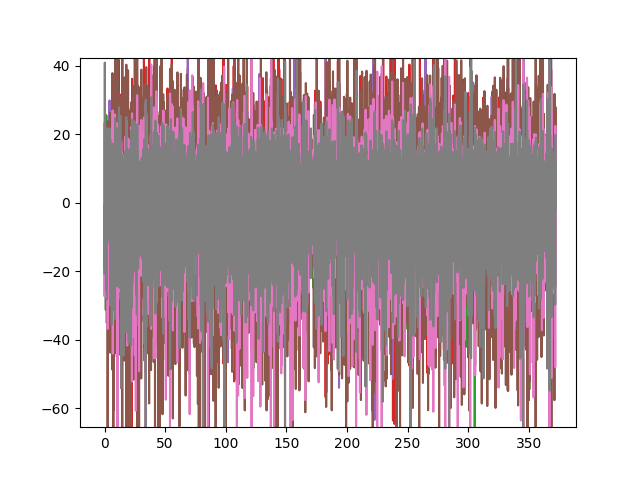

In [46]:
plt.plot(example_chan[1],example_chan[0].T)
plt.show()


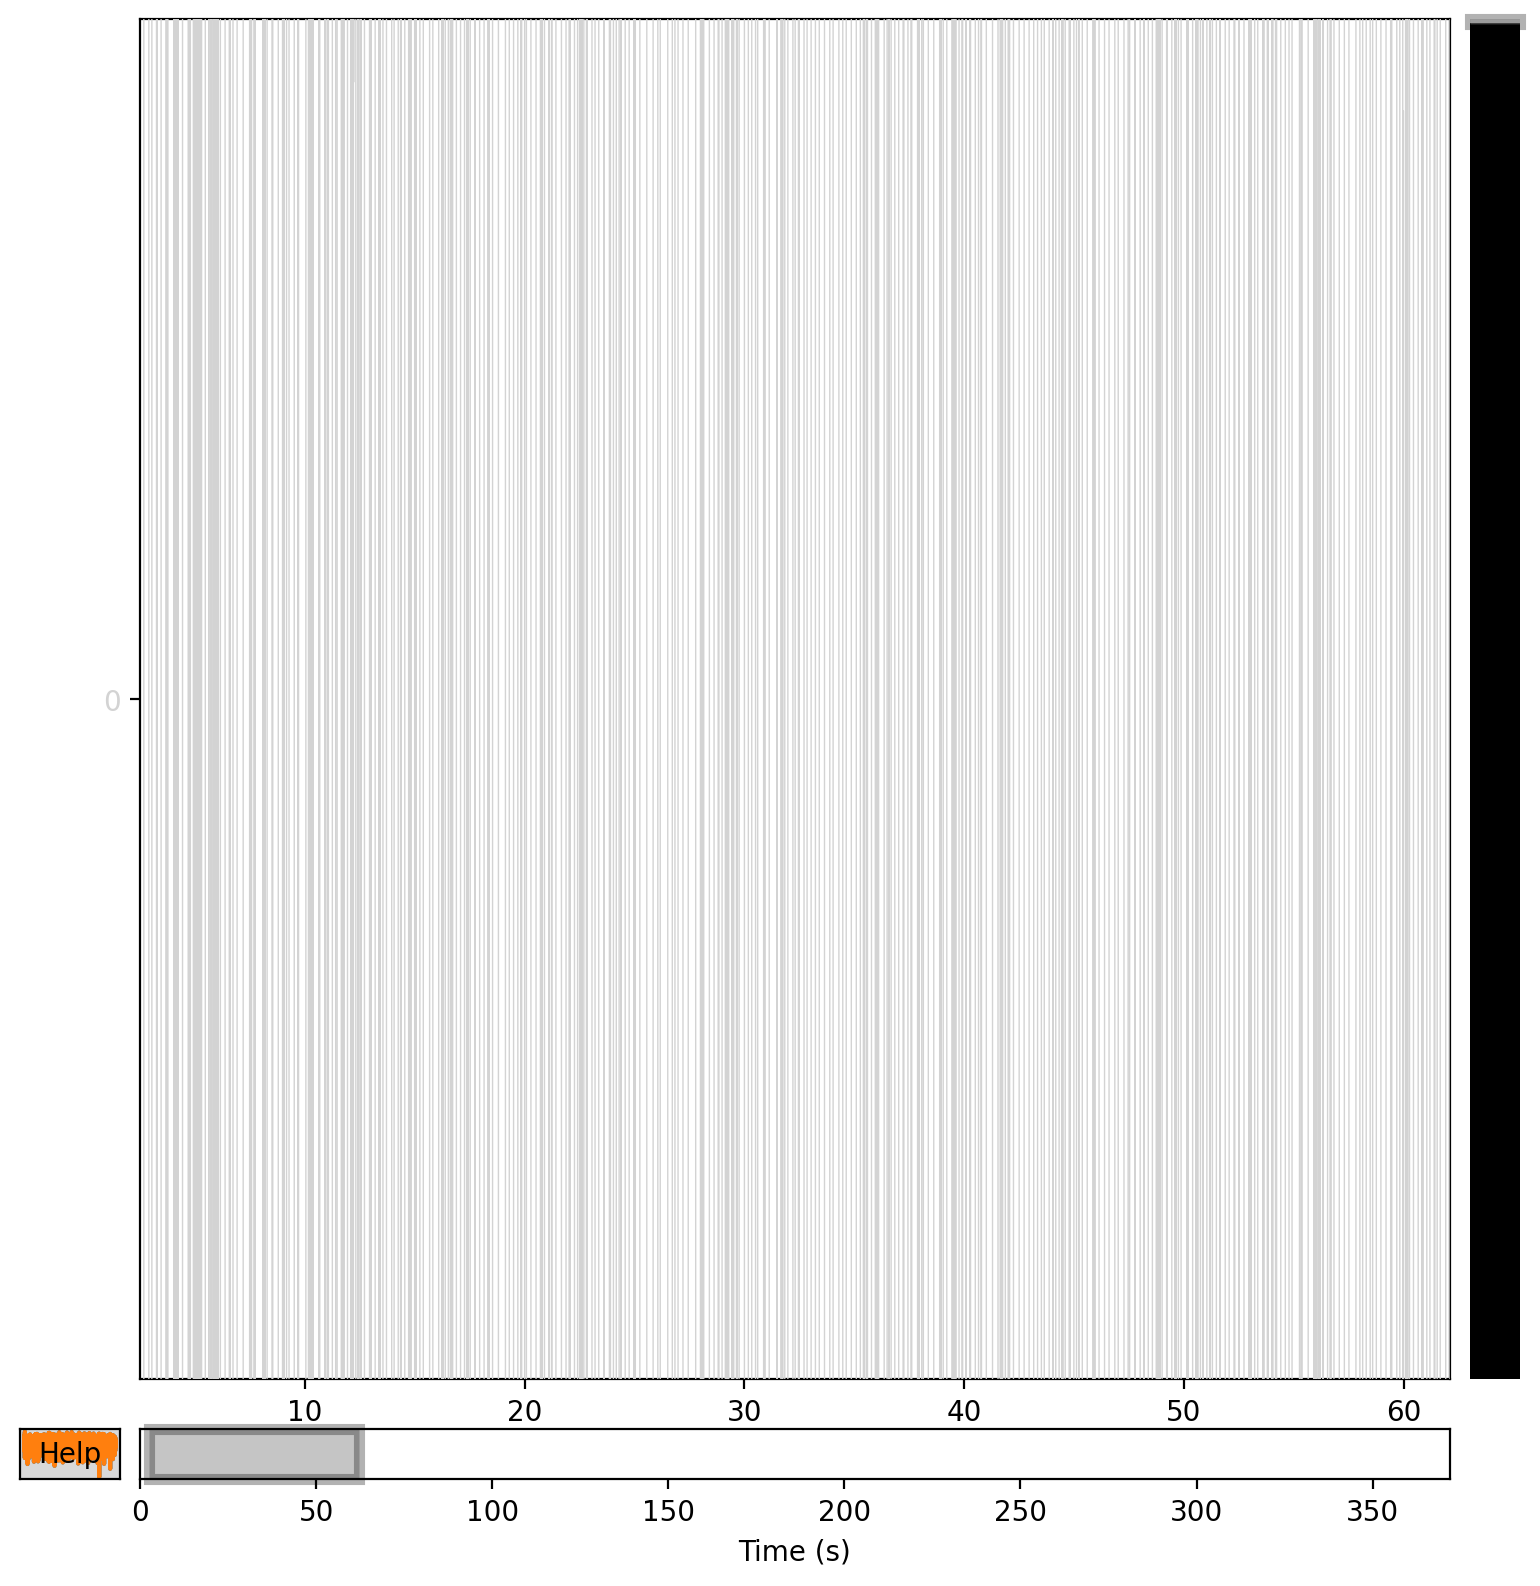

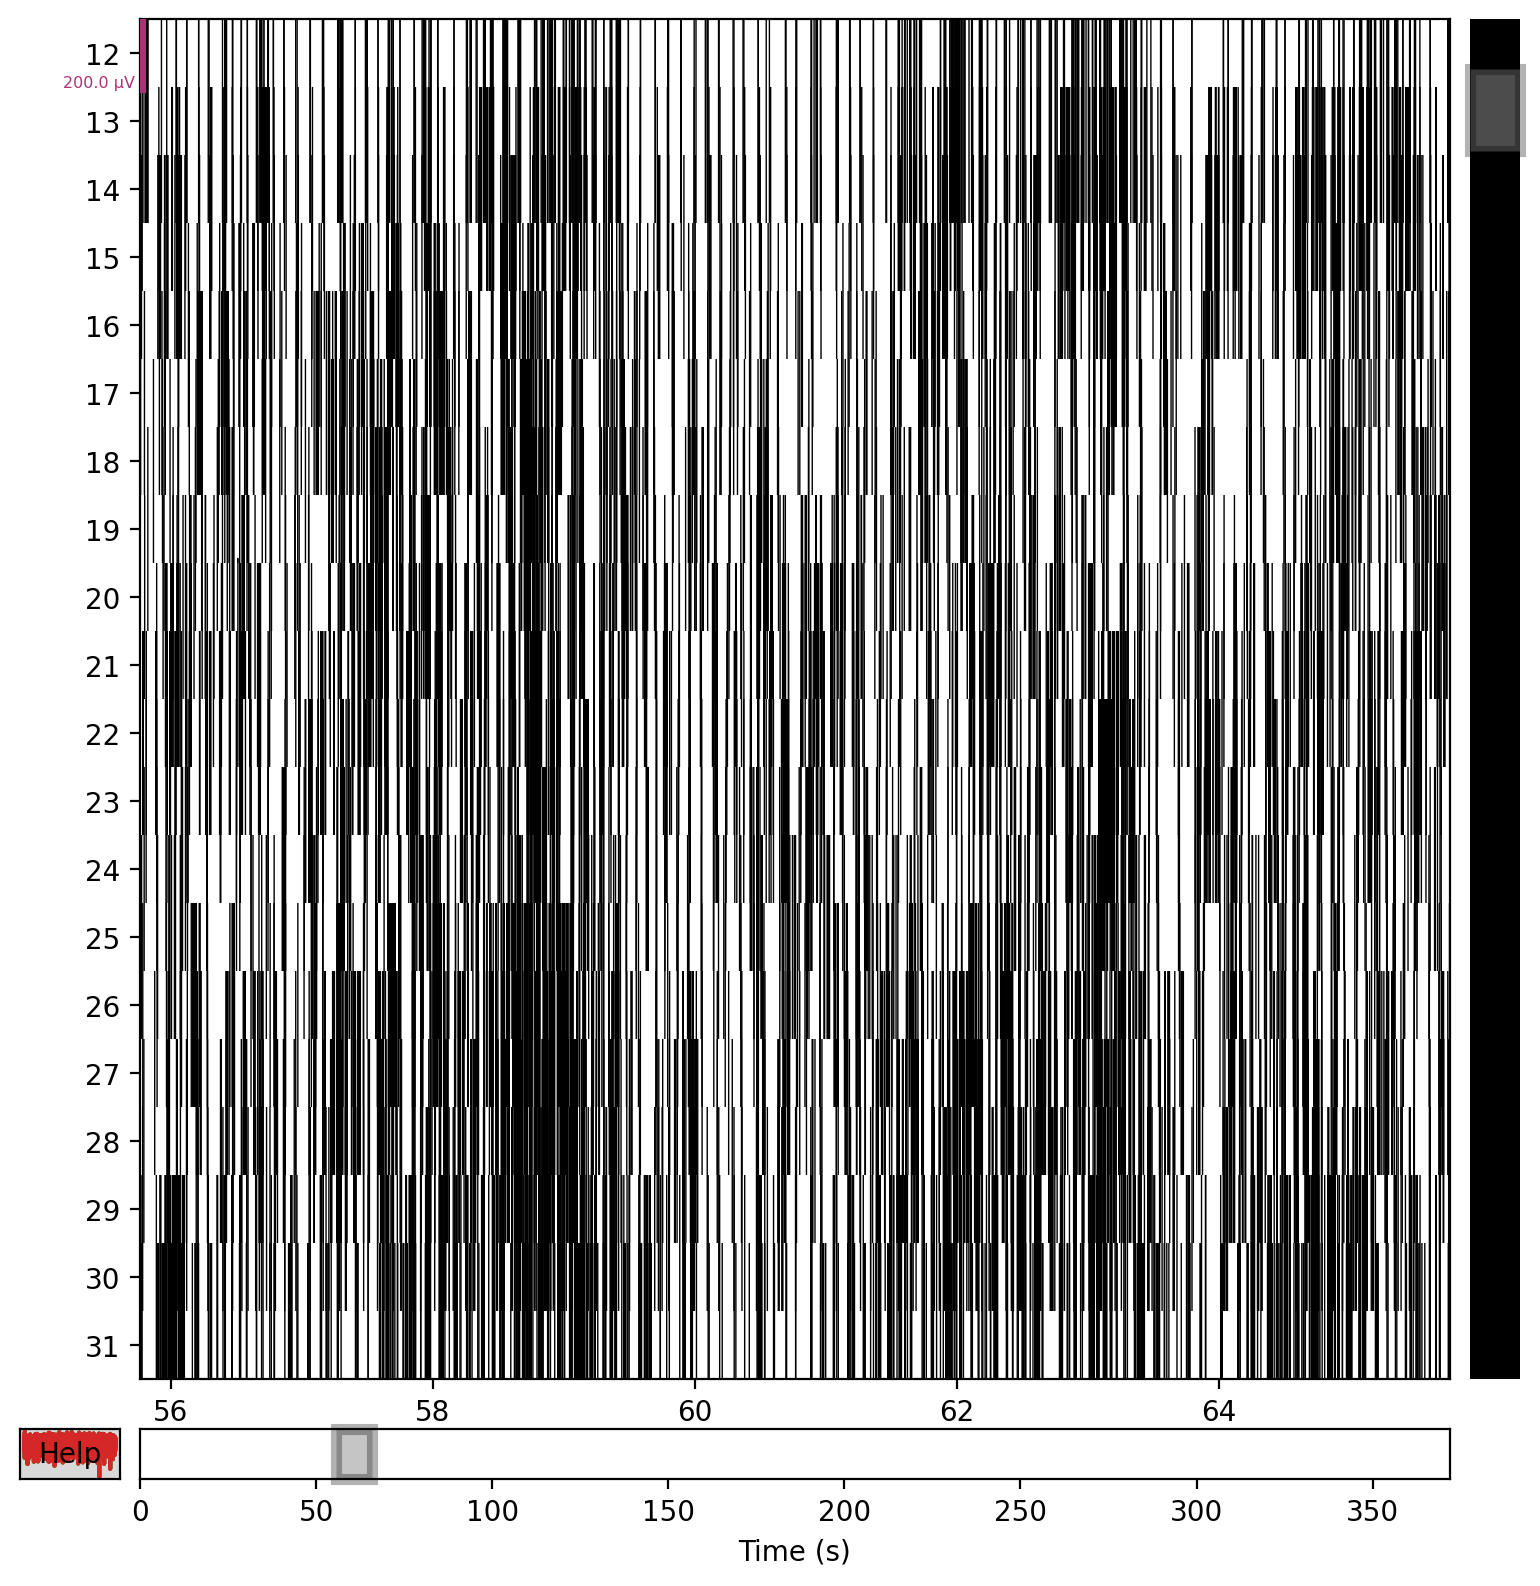

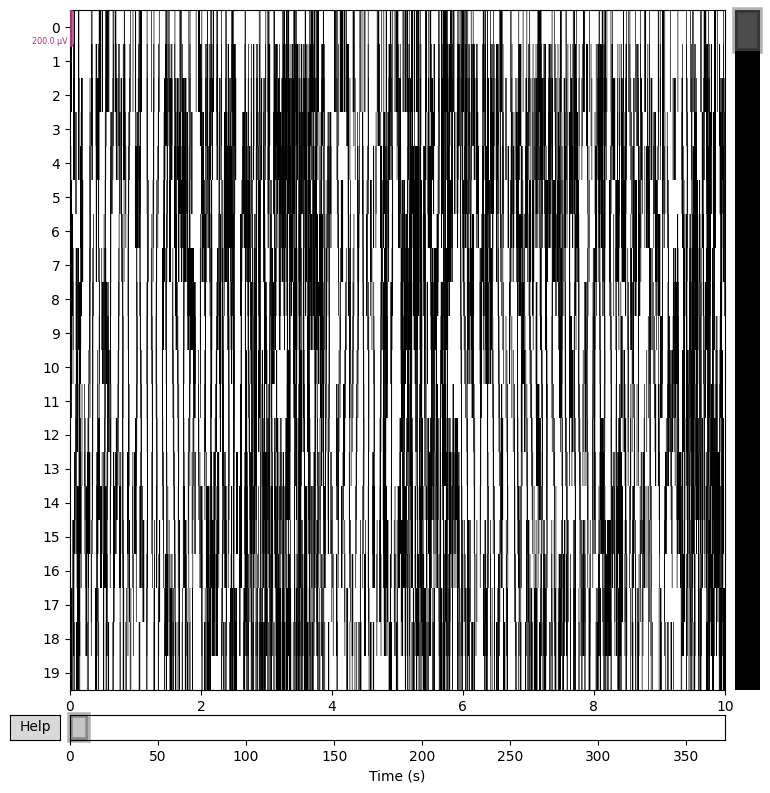

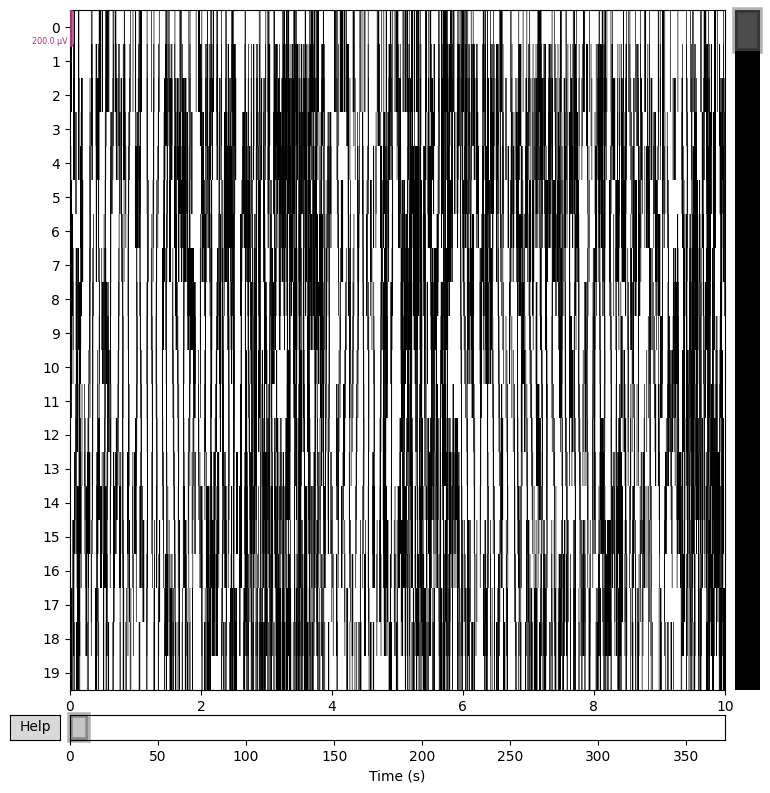

In [ ]:
raw.plot()